<a href="https://colab.research.google.com/github/Vishnug21/Data-Science-Project/blob/main/Task_2_using_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load and normalize CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


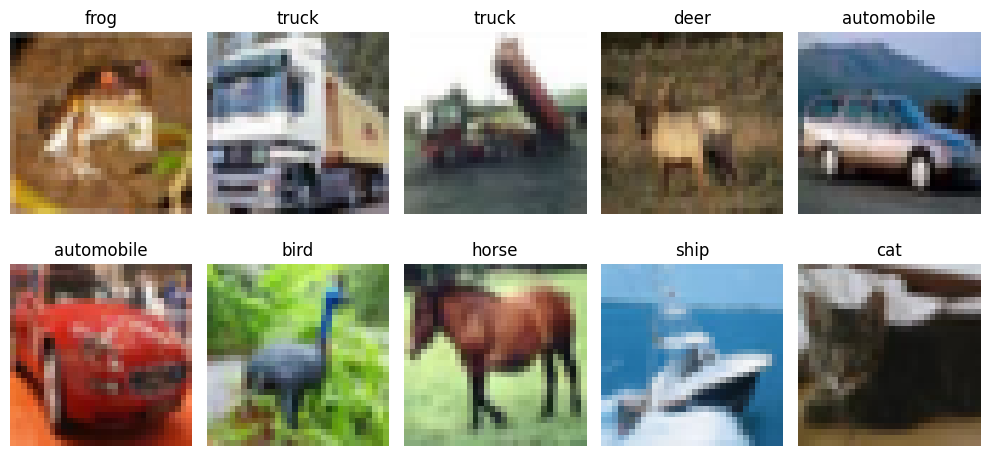

In [2]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test),
                    batch_size=64)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3363 - loss: 1.8028 - val_accuracy: 0.5310 - val_loss: 1.2934
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5586 - loss: 1.2470 - val_accuracy: 0.6093 - val_loss: 1.0970
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6224 - loss: 1.0647 - val_accuracy: 0.6317 - val_loss: 1.0213
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6548 - loss: 0.9717 - val_accuracy: 0.6634 - val_loss: 0.9585
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6899 - loss: 0.8814 - val_accuracy: 0.6586 - val_loss: 0.9988
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7085 - loss: 0.8257 - val_accuracy: 0.6864 - val_loss: 0.8935
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7305 - loss: 0.7672 - val_accuracy: 0.6917 - val_loss: 0.8931
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7453 - loss: 0.7263 - val_accuracy: 0

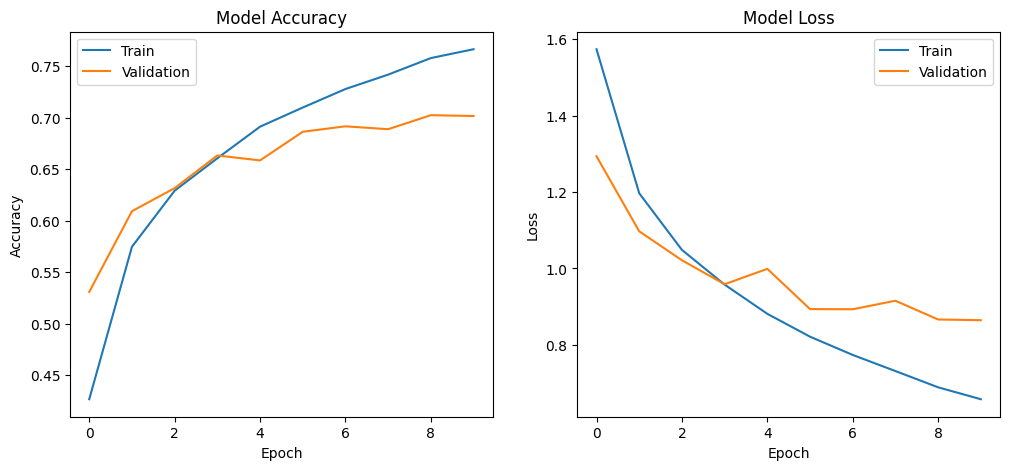

In [5]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


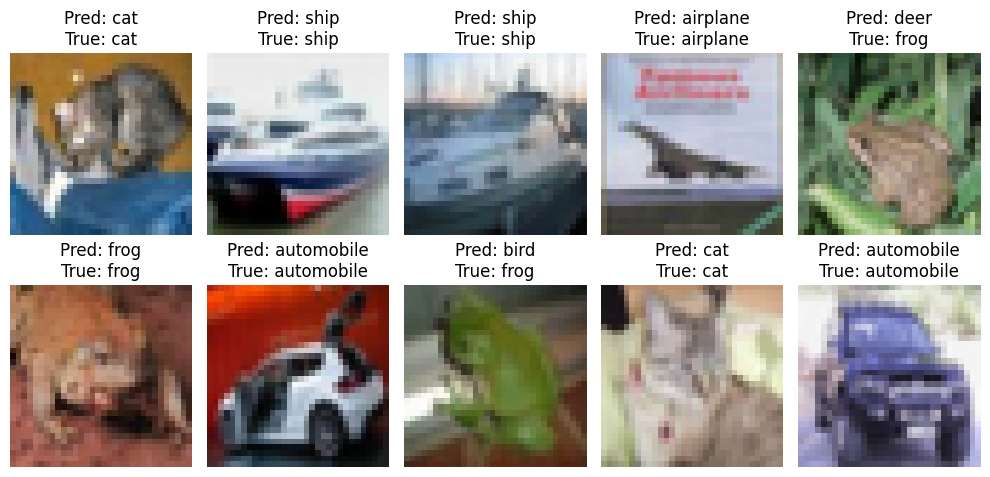

In [6]:
prob_model = tf.keras.Sequential([model, layers.Softmax()])
predictions = prob_model.predict(x_test)

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i])
    pred = class_names[np.argmax(predictions[i])]
    actual = class_names[y_test[i][0]]
    plt.title(f"Pred: {pred}\nTrue: {actual}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [7]:
!pip install scikit-learn


In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [9]:
# Get predicted labels
y_pred = np.argmax(predictions, axis=1)
y_true = y_test.flatten()


In [10]:
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


Classification Report:

              precision    recall  f1-score   support

    airplane       0.67      0.79      0.73      1000
  automobile       0.83      0.83      0.83      1000
        bird       0.58      0.65      0.61      1000
         cat       0.51      0.54      0.52      1000
        deer       0.72      0.57      0.63      1000
         dog       0.56      0.66      0.61      1000
        frog       0.87      0.69      0.77      1000
       horse       0.77      0.74      0.75      1000
        ship       0.80      0.80      0.80      1000
       truck       0.81      0.76      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



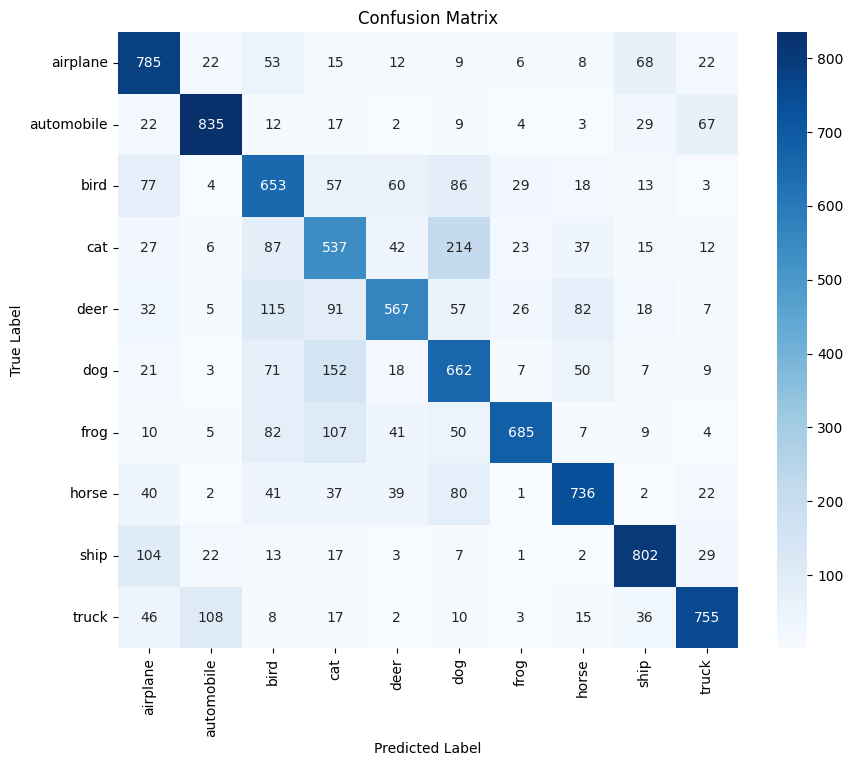

In [11]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
